# Part 3 analysis
## todo:
- [ ] revise to plotly graphing library
- [ ] rerun original results

In [41]:
import pandas as pd
from colorama import Fore, Style, Back
import os
import seaborn as sns

In [42]:

data_df = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/dense_analysis_results.xlsx", sheet_name="raw data")
data_jats_df = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/dense_analysis_results.xlsx", sheet_name="raw data")
data_multi_lang_df = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/dense_analysis_results.xlsx", sheet_name="raw data")
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
file_folder = "/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/tables/"

# Precision
look at precision values across all three datasets

In [43]:
# precision
data_df_grouped = data_df.groupby(data_df['Query'])[['Precision']].agg(['mean','max','min','std'])
data_df_grouped

Precision  ...    
                                                        mean  ... std
Query                                                         ...    
['How is RAG used to improve question answering...  0.955556  ... NaN
['Tell me about Crossref.']                         0.911111  ... NaN
['Tell me about OpenAlex.']                         0.955556  ... NaN
['What are the key features and limitations of ...  0.955556  ... NaN
['What are the main challenges in normalizing c...  0.911111  ... NaN
['What are the strengths and weaknesses of Web ...  0.911111  ... NaN
['What is Crossref’s role in the scholarly rese...  0.977778  ... NaN
['What methods are used to detect and correct e...  0.911111  ... NaN
['Which papers address funding metadata, its av...  0.911111  ... NaN
['Which papers discuss the use of Retrieval-Aug...  0.955556  ... NaN
['Which papers evaluate the linguistic coverage...  0.933333  ... NaN
['tell me about how RAG works.']                    0.911111  ... NaN
['which studies examined citations?']               0.933333  ... NaN
['which studies examined the abstract in metada...  0.866667  ... NaN

[14 rows x 4 columns]

In [44]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_precision = data_df[['Query', 'Precision']]
data_jats_df_precision = data_jats_df[['Query','Precision']]
data_multi_lang_df_precision = data_multi_lang_df[['Query','Precision']]
print(len(data_df_precision))
print(len(data_jats_df_precision))
data_combined_precision = data_df_precision.join(data_jats_df_precision, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_precision.drop(columns='Query_jats', inplace=True)
data_combined_precision = data_combined_precision.join(data_multi_lang_df_precision, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_precision.drop(columns='Query', inplace=True)
data_combined_precision = data_combined_precision.rename(columns={'Query_data':'Query','Precision_data':'Precision_data','Precision_jats':'Precision_jats','Precision':'Precision_multi_lang'})

# save out
file_name = "data_combined_precision.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_precision.to_excel(save_location)
data_combined_precision



14
14


,Query,Precision_data,Precision_jats,Precision_multi_lang
0,['which studies examined the abstract in metad...,0.866667,0.866667,0.866667
1,['which studies examined citations?'],0.933333,0.933333,0.933333
2,['Tell me about OpenAlex.'],0.955556,0.955556,0.955556
3,['Tell me about Crossref.'],0.911111,0.911111,0.911111
4,['Which papers evaluate the linguistic coverag...,0.933333,0.933333,0.933333
5,"['Which papers address funding metadata, its a...",0.911111,0.911111,0.911111
6,['Which papers discuss the use of Retrieval-Au...,0.955556,0.955556,0.955556
7,['What is Crossref’s role in the scholarly res...,0.977778,0.977778,0.977778
8,['What are the key features and limitations of...,0.955556,0.955556,0.955556
9,['What are the strengths and weaknesses of Web...,0.911111,0.911111,0.911111


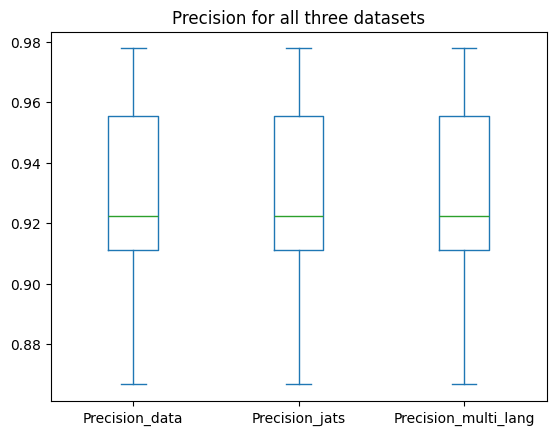

In [45]:
import matplotlib.pyplot as plt

data_combined_precision[['Precision_data','Precision_jats','Precision_multi_lang']].plot(kind='box',title='Precision for all three datasets')
plt.show()

In [47]:
# get mean, max, min
data_combined_precision_grouped = pd.DataFrame(data_combined_precision.groupby(data_combined_precision['Query'])[['Precision_data', 'Precision_jats','Precision_multi_lang']].agg('mean'))

data_combined_precision_data_avg = data_combined_precision_grouped['Precision_data'].mean()
data_combined_precision_data_jats_avg = data_combined_precision_grouped['Precision_jats'].mean()
data_combined_precision_data_multi_lang_avg = data_combined_precision_grouped['Precision_multi_lang'].mean()
print(f"Precision_data column mean: {data_combined_precision_data_avg:.4f}")
print(f"Precision_jats column mean: {data_combined_precision_data_jats_avg:.4f}")
print(f"Precision_multi_lang column mean: {data_combined_precision_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Precision_data':data_combined_precision_data_avg,
    'Precision_jats':data_combined_precision_data_jats_avg,
    'Precision_multi_lang':data_combined_precision_data_multi_lang_avg
}
precision_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{precision_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_precision_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_precision_grouped.to_excel(save_location)

file_name = "precision_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
precision_grouped_means.to_excel(save_location)
data_combined_precision_grouped

Precision_data column mean: 0.9286
Precision_jats column mean: 0.9286
Precision_multi_lang column mean: 0.9286
   index  Precision_data  Precision_jats  Precision_multi_lang
0      0        0.928571        0.928571              0.928571


,Precision_data,Precision_jats,Precision_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.955556,0.955556,0.955556
['Tell me about Crossref.'],0.911111,0.911111,0.911111
['Tell me about OpenAlex.'],0.955556,0.955556,0.955556
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.955556,0.955556,0.955556
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.911111,0.911111,0.911111
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.911111,0.911111,0.911111
['What is Crossref’s role in the scholarly research ecosystem?'],0.977778,0.977778,0.977778
['What methods are used to detect and correct errors in bibliographic datasets?'],0.911111,0.911111,0.911111
"['Which papers address funding metadata, its availability, or its analysis in scholarly databases?']",0.911111,0.911111,0.911111


# Recall scores

In [48]:
# precision
data_df_grouped = data_df.groupby(data_df['Query'])[['Recall']].agg(['mean','max','min','std'])
data_df_grouped

Recall  ...    
                                                        mean  ... std
Query                                                         ...    
['How is RAG used to improve question answering...  0.955556  ... NaN
['Tell me about Crossref.']                         0.911111  ... NaN
['Tell me about OpenAlex.']                         0.955556  ... NaN
['What are the key features and limitations of ...  0.955556  ... NaN
['What are the main challenges in normalizing c...  0.911111  ... NaN
['What are the strengths and weaknesses of Web ...  0.911111  ... NaN
['What is Crossref’s role in the scholarly rese...  0.977778  ... NaN
['What methods are used to detect and correct e...  0.911111  ... NaN
['Which papers address funding metadata, its av...  0.911111  ... NaN
['Which papers discuss the use of Retrieval-Aug...  0.955556  ... NaN
['Which papers evaluate the linguistic coverage...  0.933333  ... NaN
['tell me about how RAG works.']                    0.911111  ... NaN
['which studies examined citations?']               0.933333  ... NaN
['which studies examined the abstract in metada...  0.866667  ... NaN

[14 rows x 4 columns]

In [49]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_recall = data_df[['Query', 'Recall']]
data_jats_df_recall = data_jats_df[['Query','Recall']]
data_multi_lang_df_recall = data_multi_lang_df[['Query','Recall']]
print(len(data_df_recall))
print(len(data_jats_df_recall))
data_combined_recall = data_df_recall.join(data_jats_df_recall, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_recall.drop(columns='Query_jats', inplace=True)
data_combined_recall = data_combined_recall.join(data_multi_lang_df_recall, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_recall.drop(columns='Query', inplace=True)
data_combined_recall = data_combined_recall.rename(columns={'Query_data':'Query','Recall_data':'Recall_data','Recall_jats':'Recall_jats','Recall':'Recall_multi_lang'})
data_combined_recall

14
14


,Query,Recall_data,Recall_jats,Recall_multi_lang
0,['which studies examined the abstract in metad...,0.866667,0.866667,0.866667
1,['which studies examined citations?'],0.933333,0.933333,0.933333
2,['Tell me about OpenAlex.'],0.955556,0.955556,0.955556
3,['Tell me about Crossref.'],0.911111,0.911111,0.911111
4,['Which papers evaluate the linguistic coverag...,0.933333,0.933333,0.933333
5,"['Which papers address funding metadata, its a...",0.911111,0.911111,0.911111
6,['Which papers discuss the use of Retrieval-Au...,0.955556,0.955556,0.955556
7,['What is Crossref’s role in the scholarly res...,0.977778,0.977778,0.977778
8,['What are the key features and limitations of...,0.955556,0.955556,0.955556
9,['What are the strengths and weaknesses of Web...,0.911111,0.911111,0.911111


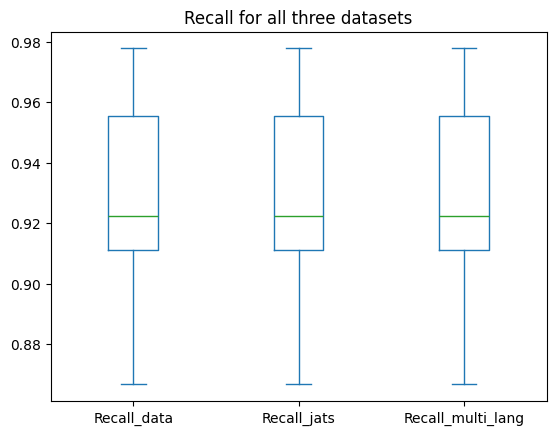

In [50]:
data_combined_recall[['Recall_data','Recall_jats','Recall_multi_lang']].plot(kind='box',title='Recall for all three datasets')
plt.show()

In [51]:
# get mean, max, min
data_combined_recall_grouped = pd.DataFrame(data_combined_recall.groupby(data_combined_recall['Query'])[['Recall_data', 'Recall_jats','Recall_multi_lang']].agg('mean'))

data_combined_recall_data_avg = data_combined_recall_grouped['Recall_data'].mean()
data_combined_recall_data_jats_avg = data_combined_recall_grouped['Recall_jats'].mean()
data_combined_recall_data_multi_lang_avg = data_combined_recall_grouped['Recall_multi_lang'].mean()
print(f"Recall_data column mean: {data_combined_recall_data_avg:.4f}")
print(f"Recall_jats column mean: {data_combined_recall_data_jats_avg:.4f}")
print(f"Recall_multi_lang column mean: {data_combined_recall_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Recall_data':data_combined_recall_data_avg,
    'Recall_jats':data_combined_recall_data_jats_avg,
    'Recall_multi_lang':data_combined_recall_data_multi_lang_avg
}
recall_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{recall_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_recall_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_recall_grouped.to_excel(save_location)

file_name = "recall_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
recall_grouped_means.to_excel(save_location)
data_combined_recall_grouped

#data_combined_recall_median = pd.DataFrame(data_combined_recall.groupby(data_combined_recall['Query'])[['Recall_data', 'Recall_jats','Recall_multi_lang']].agg('median'))
#data_combined_recall_median

Recall_data column mean: 0.9286
Recall_jats column mean: 0.9286
Recall_multi_lang column mean: 0.9286
   index  Recall_data  Recall_jats  Recall_multi_lang
0      0     0.928571     0.928571           0.928571


,Recall_data,Recall_jats,Recall_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.955556,0.955556,0.955556
['Tell me about Crossref.'],0.911111,0.911111,0.911111
['Tell me about OpenAlex.'],0.955556,0.955556,0.955556
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.955556,0.955556,0.955556
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.911111,0.911111,0.911111
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.911111,0.911111,0.911111
['What is Crossref’s role in the scholarly research ecosystem?'],0.977778,0.977778,0.977778
['What methods are used to detect and correct errors in bibliographic datasets?'],0.911111,0.911111,0.911111
"['Which papers address funding metadata, its availability, or its analysis in scholarly databases?']",0.911111,0.911111,0.911111


# F1 scores

In [52]:
# F1 scores
data_df_grouped = data_df.groupby(data_df['Query'])[['F1-Score']].agg(['mean','max','min','std'])
data_df_grouped

F1-Score  ...    
                                                        mean  ... std
Query                                                         ...    
['How is RAG used to improve question answering...  0.955556  ... NaN
['Tell me about Crossref.']                         0.911111  ... NaN
['Tell me about OpenAlex.']                         0.955556  ... NaN
['What are the key features and limitations of ...  0.955556  ... NaN
['What are the main challenges in normalizing c...  0.911111  ... NaN
['What are the strengths and weaknesses of Web ...  0.911111  ... NaN
['What is Crossref’s role in the scholarly rese...  0.977778  ... NaN
['What methods are used to detect and correct e...  0.911111  ... NaN
['Which papers address funding metadata, its av...  0.911111  ... NaN
['Which papers discuss the use of Retrieval-Aug...  0.955556  ... NaN
['Which papers evaluate the linguistic coverage...  0.933333  ... NaN
['tell me about how RAG works.']                    0.911111  ... NaN
['which studies examined citations?']               0.933333  ... NaN
['which studies examined the abstract in metada...  0.866667  ... NaN

[14 rows x 4 columns]

In [53]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_F1 = data_df[['Query', 'F1-Score']]
data_jats_df_F1 = data_jats_df[['Query','F1-Score']]
data_multi_lang_df_F1 = data_multi_lang_df[['Query','F1-Score']]
print(len(data_df_F1))
print(len(data_jats_df_F1))
data_combined_F1 = data_df_F1.join(data_jats_df_F1, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_F1.drop(columns='Query_jats', inplace=True)
data_combined_F1 = data_combined_F1.join(data_multi_lang_df_F1, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_F1.drop(columns='Query', inplace=True)
data_combined_F1 = data_combined_F1.rename(columns={'Query_data':'Query','F1-Score_data':'F1-Score_data','F1-Score_jats':'F1-Score_jats','F1-Score':'F1-Score_multi_lang'})
data_combined_F1

14
14


,Query,F1-Score_data,F1-Score_jats,F1-Score_multi_lang
0,['which studies examined the abstract in metad...,0.866667,0.866667,0.866667
1,['which studies examined citations?'],0.933333,0.933333,0.933333
2,['Tell me about OpenAlex.'],0.955556,0.955556,0.955556
3,['Tell me about Crossref.'],0.911111,0.911111,0.911111
4,['Which papers evaluate the linguistic coverag...,0.933333,0.933333,0.933333
5,"['Which papers address funding metadata, its a...",0.911111,0.911111,0.911111
6,['Which papers discuss the use of Retrieval-Au...,0.955556,0.955556,0.955556
7,['What is Crossref’s role in the scholarly res...,0.977778,0.977778,0.977778
8,['What are the key features and limitations of...,0.955556,0.955556,0.955556
9,['What are the strengths and weaknesses of Web...,0.911111,0.911111,0.911111


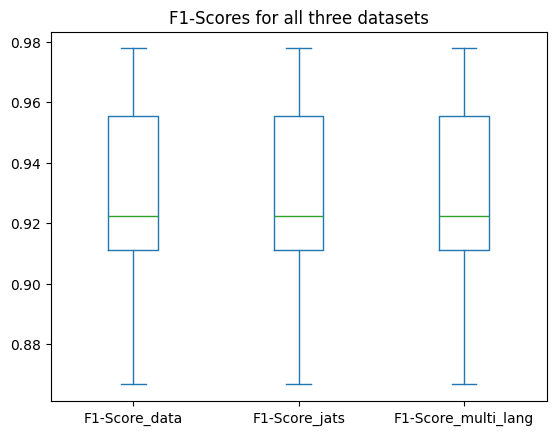

In [54]:
data_combined_F1[['F1-Score_data','F1-Score_jats','F1-Score_multi_lang']].plot(kind='box',title='F1-Scores for all three datasets')
plt.show()

In [55]:
# get mean, max, min
data_combined_F1_grouped = pd.DataFrame(data_combined_F1.groupby(data_combined_F1['Query'])[['F1-Score_data', 'F1-Score_jats','F1-Score_multi_lang']].agg('mean'))

data_combined_F1_data_avg = data_combined_F1_grouped['F1-Score_data'].mean()
data_combined_F1_data_jats_avg = data_combined_F1_grouped['F1-Score_jats'].mean()
data_combined_F1_data_multi_lang_avg = data_combined_F1_grouped['F1-Score_multi_lang'].mean()
print(f"F1_data column mean: {data_combined_F1_data_avg:.4f}")
print(f"F1_jats column mean: {data_combined_F1_data_jats_avg:.4f}")
print(f"F1_multi_lang column mean: {data_combined_F1_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'F1-Score_data':data_combined_F1_data_avg,
    'F1-Score_jats':data_combined_F1_data_jats_avg,
    'F1-Score_multi_lang':data_combined_F1_data_multi_lang_avg
}
F1_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{F1_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_F1_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_F1_grouped.to_excel(save_location)

file_name = "F1_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
F1_grouped_means.to_excel(save_location)
data_combined_F1_grouped

F1_data column mean: 0.9286
F1_jats column mean: 0.9286
F1_multi_lang column mean: 0.9286
   index  F1-Score_data  F1-Score_jats  F1-Score_multi_lang
0      0       0.928571       0.928571             0.928571


,F1-Score_data,F1-Score_jats,F1-Score_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.955556,0.955556,0.955556
['Tell me about Crossref.'],0.911111,0.911111,0.911111
['Tell me about OpenAlex.'],0.955556,0.955556,0.955556
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.955556,0.955556,0.955556
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.911111,0.911111,0.911111
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.911111,0.911111,0.911111
['What is Crossref’s role in the scholarly research ecosystem?'],0.977778,0.977778,0.977778
['What methods are used to detect and correct errors in bibliographic datasets?'],0.911111,0.911111,0.911111
"['Which papers address funding metadata, its availability, or its analysis in scholarly databases?']",0.911111,0.911111,0.911111


# Accuracy

In [56]:
# accuracy scores
data_df_grouped = data_df.groupby(data_df['Query'])[['Accuracy']].agg(['mean','max','min','std'])
data_df_grouped

Accuracy  ...    
                                                        mean  ... std
Query                                                         ...    
['How is RAG used to improve question answering...  0.955556  ... NaN
['Tell me about Crossref.']                         0.911111  ... NaN
['Tell me about OpenAlex.']                         0.955556  ... NaN
['What are the key features and limitations of ...  0.955556  ... NaN
['What are the main challenges in normalizing c...  0.911111  ... NaN
['What are the strengths and weaknesses of Web ...  0.911111  ... NaN
['What is Crossref’s role in the scholarly rese...  0.977778  ... NaN
['What methods are used to detect and correct e...  0.911111  ... NaN
['Which papers address funding metadata, its av...  0.911111  ... NaN
['Which papers discuss the use of Retrieval-Aug...  0.955556  ... NaN
['Which papers evaluate the linguistic coverage...  0.933333  ... NaN
['tell me about how RAG works.']                    0.911111  ... NaN
['which studies examined citations?']               0.933333  ... NaN
['which studies examined the abstract in metada...  0.866667  ... NaN

[14 rows x 4 columns]

In [58]:
# combine all into one df and look at boxplot

data_df_accuracy = data_df[['Query', 'Accuracy']]
data_jats_df_accuracy = data_jats_df[['Query','Accuracy']]
data_multi_lang_df_accuracy = data_multi_lang_df[['Query','Accuracy']]
print(len(data_df_accuracy))
print(len(data_jats_df_accuracy))
data_combined_accuracy = data_df_accuracy.join(data_jats_df_accuracy, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_accuracy.drop(columns='Query_jats', inplace=True)
data_combined_accuracy = data_combined_accuracy.join(data_multi_lang_df_accuracy, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_accuracy.drop(columns='Query', inplace=True)
data_combined_accuracy = data_combined_accuracy.rename(columns={'Query_data':'Query','Accuracy_data':'Accuracy_data','Accuracy_jats':'Accuracy_jats','Accuracy':'Accuracy_multi_lang'})
data_combined_accuracy

14
14


,Query,Accuracy_data,Accuracy_jats,Accuracy_multi_lang
0,['which studies examined the abstract in metad...,0.866667,0.866667,0.866667
1,['which studies examined citations?'],0.933333,0.933333,0.933333
2,['Tell me about OpenAlex.'],0.955556,0.955556,0.955556
3,['Tell me about Crossref.'],0.911111,0.911111,0.911111
4,['Which papers evaluate the linguistic coverag...,0.933333,0.933333,0.933333
5,"['Which papers address funding metadata, its a...",0.911111,0.911111,0.911111
6,['Which papers discuss the use of Retrieval-Au...,0.955556,0.955556,0.955556
7,['What is Crossref’s role in the scholarly res...,0.977778,0.977778,0.977778
8,['What are the key features and limitations of...,0.955556,0.955556,0.955556
9,['What are the strengths and weaknesses of Web...,0.911111,0.911111,0.911111


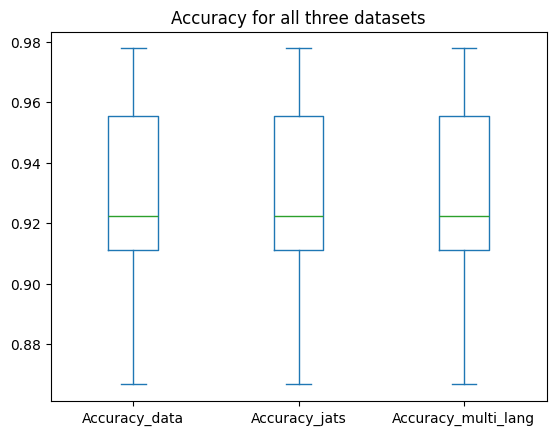

In [59]:
data_combined_accuracy[['Accuracy_data','Accuracy_jats','Accuracy_multi_lang']].plot(kind='box',title='Accuracy for all three datasets')
plt.show()

In [60]:
# get mean, max, min
data_combined_accuracy_grouped = pd.DataFrame(data_combined_accuracy.groupby(data_combined_accuracy['Query'])[['Accuracy_data', 'Accuracy_jats','Accuracy_multi_lang']].agg('mean'))

data_combined_accuracy_data_avg = data_combined_accuracy_grouped['Accuracy_data'].mean()
data_combined_accuracy_data_jats_avg = data_combined_accuracy_grouped['Accuracy_jats'].mean()
data_combined_accuracy_data_multi_lang_avg = data_combined_accuracy_grouped['Accuracy_multi_lang'].mean()
print(f"accuracy_data column mean: {data_combined_accuracy_data_avg:.4f}")
print(f"accuracy_jats column mean: {data_combined_accuracy_data_jats_avg:.4f}")
print(f"accuracy_multi_lang column mean: {data_combined_accuracy_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Accuracy_data':data_combined_accuracy_data_avg,
    'Accuracy_jats':data_combined_accuracy_data_jats_avg,
    'Accuracy_multi_lang':data_combined_accuracy_data_multi_lang_avg
}
accuracy_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{accuracy_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_accuracy_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_accuracy_grouped.to_excel(save_location)

file_name = "accuracy_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
accuracy_grouped_means.to_excel(save_location)
data_combined_accuracy_grouped

accuracy_data column mean: 0.9286
accuracy_jats column mean: 0.9286
accuracy_multi_lang column mean: 0.9286
   index  Accuracy_data  Accuracy_jats  Accuracy_multi_lang
0      0       0.928571       0.928571             0.928571


,Accuracy_data,Accuracy_jats,Accuracy_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.955556,0.955556,0.955556
['Tell me about Crossref.'],0.911111,0.911111,0.911111
['Tell me about OpenAlex.'],0.955556,0.955556,0.955556
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.955556,0.955556,0.955556
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.911111,0.911111,0.911111
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.911111,0.911111,0.911111
['What is Crossref’s role in the scholarly research ecosystem?'],0.977778,0.977778,0.977778
['What methods are used to detect and correct errors in bibliographic datasets?'],0.911111,0.911111,0.911111
"['Which papers address funding metadata, its availability, or its analysis in scholarly databases?']",0.911111,0.911111,0.911111


# Balanced accuracy

In [61]:
# accuracy scores
data_df_grouped = data_df.groupby(data_df['Query'])[['Balanced accuracy']].agg(['mean','max','min','std'])
data_df_grouped

Balanced accuracy  ...    
                                                                mean  ... std
Query                                                                 ...    
['How is RAG used to improve question answering...          0.887500  ... NaN
['Tell me about Crossref.']                                 0.777778  ... NaN
['Tell me about OpenAlex.']                                 0.857143  ... NaN
['What are the key features and limitations of ...          0.887500  ... NaN
['What are the main challenges in normalizing c...          0.600000  ... NaN
['What are the strengths and weaknesses of Web ...          0.775000  ... NaN
['What is Crossref’s role in the scholarly rese...          0.900000  ... NaN
['What methods are used to detect and correct e...          0.687500  ... NaN
['Which papers address funding metadata, its av...          0.775000  ... NaN
['Which papers discuss the use of Retrieval-Aug...          0.887500  ... NaN
['Which papers evaluate the linguistic coverage...          0.787500  ... NaN
['tell me about how RAG works.']                            0.775000  ... NaN
['which studies examined citations?']                       0.700000  ... NaN
['which studies examined the abstract in metada...          0.662500  ... NaN

[14 rows x 4 columns]

In [62]:
# combine into one df
data_df_bal_accuracy = data_df[['Query', 'Balanced accuracy']]
data_jats_df_bal_accuracy = data_jats_df[['Query','Balanced accuracy']]
data_multi_lang_df_bal_accuracy = data_multi_lang_df[['Query','Balanced accuracy']]
print(len(data_df_bal_accuracy))
print(len(data_jats_df_bal_accuracy))
data_combined_bal_accuracy = data_df_bal_accuracy.join(data_jats_df_bal_accuracy, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_bal_accuracy.drop(columns='Query_jats', inplace=True)
data_combined_bal_accuracy = data_combined_bal_accuracy.join(data_multi_lang_df_bal_accuracy, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_bal_accuracy.drop(columns='Query', inplace=True)
data_combined_bal_accuracy = data_combined_bal_accuracy.rename(columns={'Query_data':'Query','Balanced accuracy_data':'Balanced accuracy_data','Balanced accuracy_jats':'Balanced accuracy_jats','Balanced accuracy':'Balanced accuracy_multi_lang'})
data_combined_bal_accuracy

14
14


,Query,Balanced accuracy_data,Balanced accuracy_jats,Balanced accuracy_multi_lang
0,['which studies examined the abstract in metad...,0.662500,0.662500,0.662500
1,['which studies examined citations?'],0.700000,0.700000,0.700000
2,['Tell me about OpenAlex.'],0.857143,0.857143,0.857143
3,['Tell me about Crossref.'],0.777778,0.777778,0.777778
4,['Which papers evaluate the linguistic coverag...,0.787500,0.787500,0.787500
5,"['Which papers address funding metadata, its a...",0.775000,0.775000,0.775000
6,['Which papers discuss the use of Retrieval-Au...,0.887500,0.887500,0.887500
7,['What is Crossref’s role in the scholarly res...,0.900000,0.900000,0.900000
8,['What are the key features and limitations of...,0.887500,0.887500,0.887500
9,['What are the strengths and weaknesses of Web...,0.775000,0.775000,0.775000


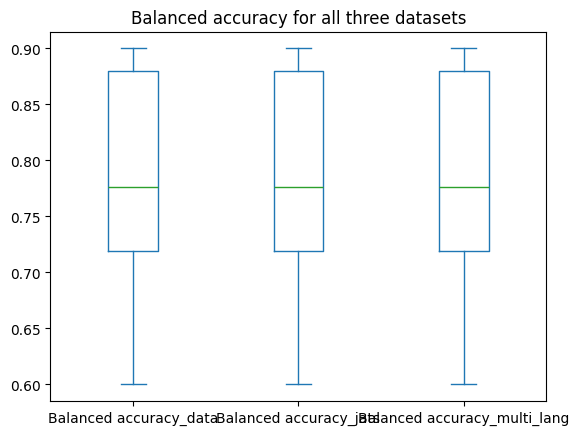

In [63]:
data_combined_bal_accuracy[['Balanced accuracy_data','Balanced accuracy_jats','Balanced accuracy_multi_lang']].plot(kind='box',title='Balanced accuracy for all three datasets')
plt.show()

In [65]:
# get mean, max, min
data_combined_bal_accuracy_grouped = pd.DataFrame(data_combined_bal_accuracy.groupby(data_combined_bal_accuracy['Query'])[['Balanced accuracy_data', 'Balanced accuracy_jats','Balanced accuracy_multi_lang']].agg('mean'))

data_combined_bal_accuracy_data_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_data'].mean()
data_combined_bal_accuracy_data_jats_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_jats'].mean()
data_combined_bal_accuracy_data_multi_lang_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_multi_lang'].mean()
print(f"bal_accuracy_data column mean: {data_combined_bal_accuracy_data_avg:.4f}")
print(f"bal_accuracy_jats column mean: {data_combined_bal_accuracy_data_jats_avg:.4f}")
print(f"bal_accuracy_multi_lang column mean: {data_combined_bal_accuracy_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Balanced accuracy_data':data_combined_bal_accuracy_data_avg,
    'Balanced accuracy_jats':data_combined_bal_accuracy_data_jats_avg,
    'Balanced accuracy_multi_lang':data_combined_bal_accuracy_data_multi_lang_avg
}
bal_accuracy_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{bal_accuracy_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_bal_accuracy_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_bal_accuracy_grouped.to_excel(save_location)

file_name = "bal_accuracy_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
bal_accuracy_grouped_means.to_excel(save_location)
data_combined_bal_accuracy_grouped

bal_accuracy_data column mean: 0.7829
bal_accuracy_jats column mean: 0.7829
bal_accuracy_multi_lang column mean: 0.7829
   index  ...  Balanced accuracy_multi_lang
0      0  ...                      0.782851

[1 rows x 4 columns]


,Balanced accuracy_data,Balanced accuracy_jats,Balanced accuracy_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.887500,0.887500,0.887500
['Tell me about Crossref.'],0.777778,0.777778,0.777778
['Tell me about OpenAlex.'],0.857143,0.857143,0.857143
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.887500,0.887500,0.887500
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.600000,0.600000,0.600000
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.775000,0.775000,0.775000
['What is Crossref’s role in the scholarly research ecosystem?'],0.900000,0.900000,0.900000
['What methods are used to detect and correct errors in bibliographic datasets?'],0.687500,0.687500,0.687500
"['Which papers address funding metadata, its availability, or its analysis in scholarly databases?']",0.775000,0.775000,0.775000


# Faithfulness score


In [66]:
#Faithfulness score
data_df_grouped = data_df.groupby(data_df['Query'])[['Faithfulness score']].agg(['mean','max','min','std'])
data_df_grouped

Faithfulness score  ...    
                                                                 mean  ... std
Query                                                                  ...    
['How is RAG used to improve question answering...                5.0  ... NaN
['Tell me about Crossref.']                                       5.0  ... NaN
['Tell me about OpenAlex.']                                       5.0  ... NaN
['What are the key features and limitations of ...                5.0  ... NaN
['What are the main challenges in normalizing c...                1.0  ... NaN
['What are the strengths and weaknesses of Web ...                5.0  ... NaN
['What is Crossref’s role in the scholarly rese...                4.0  ... NaN
['What methods are used to detect and correct e...                3.0  ... NaN
['Which papers address funding metadata, its av...                5.0  ... NaN
['Which papers discuss the use of Retrieval-Aug...                5.0  ... NaN
['Which papers evaluate the linguistic coverage...                4.0  ... NaN
['tell me about how RAG works.']                                  5.0  ... NaN
['which studies examined citations?']                             2.0  ... NaN
['which studies examined the abstract in metada...                5.0  ... NaN

[14 rows x 4 columns]

In [67]:
# combine into one df
data_df_faithfulness = data_df[['Query', 'Faithfulness score']]
data_jats_df_faithfulness = data_jats_df[['Query','Faithfulness score']]
data_multi_lang_df_faithfulness = data_multi_lang_df[['Query','Faithfulness score']]
print(len(data_df_faithfulness))
print(len(data_jats_df_faithfulness))
data_combined_faithfulness = data_df_faithfulness.join(data_jats_df_faithfulness, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_faithfulness.drop(columns='Query_jats', inplace=True)
data_combined_faithfulness = data_combined_faithfulness.join(data_multi_lang_df_faithfulness, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_faithfulness.drop(columns='Query', inplace=True)
data_combined_faithfulness = data_combined_faithfulness.rename(columns={'Query_data':'Query','Faithfulness score_data':'Faithfulness score_data','Faithfulness score_jats':'Faithfulness score_jats','Faithfulness score':'Faithfulness score_multi_lang'})
data_combined_faithfulness

14
14


,Query,Faithfulness score_data,Faithfulness score_jats,Faithfulness score_multi_lang
0,['which studies examined the abstract in metad...,5,5,5
1,['which studies examined citations?'],2,2,2
2,['Tell me about OpenAlex.'],5,5,5
3,['Tell me about Crossref.'],5,5,5
4,['Which papers evaluate the linguistic coverag...,4,4,4
5,"['Which papers address funding metadata, its a...",5,5,5
6,['Which papers discuss the use of Retrieval-Au...,5,5,5
7,['What is Crossref’s role in the scholarly res...,4,4,4
8,['What are the key features and limitations of...,5,5,5
9,['What are the strengths and weaknesses of Web...,5,5,5


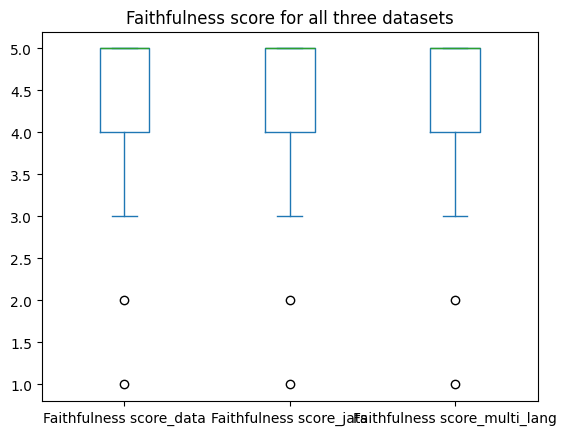

In [68]:
data_combined_faithfulness[['Faithfulness score_data','Faithfulness score_jats','Faithfulness score_multi_lang']].plot(kind='box',title='Faithfulness score for all three datasets')
plt.show()

In [70]:
# get mean, max, min
data_combined_faithfulness_grouped = pd.DataFrame(data_combined_faithfulness.groupby(data_combined_faithfulness['Query'])[['Faithfulness score_data', 'Faithfulness score_jats','Faithfulness score_multi_lang']].agg('mean'))

data_combined_faithfulness_data_avg = data_combined_faithfulness_grouped['Faithfulness score_data'].mean()
data_combined_faithfulness_data_jats_avg = data_combined_faithfulness_grouped['Faithfulness score_jats'].mean()
data_combined_faithfulness_data_multi_lang_avg = data_combined_faithfulness_grouped['Faithfulness score_multi_lang'].mean()
print(f"faithfulness_data column mean: {data_combined_faithfulness_data_avg:.4f}")
print(f"faithfulness_jats column mean: {data_combined_faithfulness_data_jats_avg:.4f}")
print(f"faithfulness_multi_lang column mean: {data_combined_faithfulness_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Faithfulness score_data':data_combined_faithfulness_data_avg,
    'Faithfulness score_jats':data_combined_faithfulness_data_jats_avg,
    'Faithfulness score_multi_lang':data_combined_faithfulness_data_multi_lang_avg
}
faithfulness_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{faithfulness_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_faithfulness_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_faithfulness_grouped.to_excel(save_location)

file_name = "faithfulness_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
faithfulness_grouped_means.to_excel(save_location)
data_combined_faithfulness_grouped

faithfulness_data column mean: 4.2143
faithfulness_jats column mean: 4.2143
faithfulness_multi_lang column mean: 4.2143
   index  ...  Faithfulness score_multi_lang
0      0  ...                       4.214286

[1 rows x 4 columns]


,Faithfulness score_data,Faithfulness score_jats,Faithfulness score_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],5.0,5.0,5.0
['Tell me about Crossref.'],5.0,5.0,5.0
['Tell me about OpenAlex.'],5.0,5.0,5.0
['What are the key features and limitations of OpenAlex as a bibliometric database?'],5.0,5.0,5.0
['What are the main challenges in normalizing citation metrics across scientific fields?'],1.0,1.0,1.0
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],5.0,5.0,5.0
['What is Crossref’s role in the scholarly research ecosystem?'],4.0,4.0,4.0
['What methods are used to detect and correct errors in bibliographic datasets?'],3.0,3.0,3.0
"['Which papers address funding metadata, its availability, or its analysis in scholarly databases?']",5.0,5.0,5.0


# Documents score
* NOTE 
There are two cells below - make sure you run the correct one for your data


## The following cell only works for documents score data from the v5 notebook
** only run this one for part_3_Cohere_RAG.ipynb results **

In [29]:
# special one for testing documents soore on Part_3_Cohere_RAG v5 notebook
#test_data = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/dense_analysis_results.xlsx")

#test_data_doc_score = pd.DataFrame(test_data['Documents score'])
#test_data_doc_score

#data_documents_score_df = pd.DataFrame(test_data['Documents score'])
#data_jats_documents_score_df = pd.DataFrame(test_data['Documents score'])
#data_multi_lang_documents_score_df = pd.DataFrame(test_data['Documents score'])

#print(test_data_doc_score.iloc[0,0].strip('[]'))
#data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))
#data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x))
#******** THE ABOVE SECTION WAS FOR DEBUGGING **************

# Documents score
from ast import literal_eval
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)

data_documents_score_df = pd.DataFrame(data_df['Documents score'])
data_jats_documents_score_df = pd.DataFrame(data_jats_df['Documents score'])
data_multi_lang_documents_score_df = pd.DataFrame(data_multi_lang_df['Documents score'])

# Strip off brackets
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))

#read the strings as literals
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
#explode nested lists into one column
data_documents_score_flatten = data_documents_score_df.explode(column='Documents score')
data_jats_documents_score_flatten = data_jats_documents_score_df.explode(column='Documents score')
data_multi_lang_documents_score_flatten = data_multi_lang_documents_score_df.explode(column='Documents score')
#separate tuple into columns
data_documents_exploded = pd.DataFrame()
data_documents_exploded[['Score','DOI']] = pd.DataFrame(data_documents_score_flatten['Documents score'].tolist(),index=data_documents_score_flatten.index)
print(len(data_documents_score_flatten))
cols = list(data_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_documents_exploded = data_documents_exploded[cols]
data_documents_exploded

#same again for jats dataset
data_jats_documents_exploded = pd.DataFrame()
data_jats_documents_exploded[['Score','DOI']] = pd.DataFrame(data_jats_documents_score_flatten['Documents score'].tolist(),index=data_jats_documents_score_flatten.index)
print(Fore.LIGHTGREEN_EX + f"length of jats: {len(data_jats_documents_score_flatten)}")
cols = list(data_jats_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_jats_documents_exploded = data_jats_documents_exploded[cols]
data_jats_documents_exploded

# and again for multi_lang dataset
data_multi_lang_documents_exploded = pd.DataFrame()
data_multi_lang_documents_exploded[['Score','DOI']] = pd.DataFrame(data_multi_lang_documents_score_flatten['Documents score'].tolist(),index=data_multi_lang_documents_score_flatten.index)
print(Fore.LIGHTCYAN_EX + f"length of multi_lang: {len(data_multi_lang_documents_score_flatten)}")
cols = list(data_multi_lang_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_multi_lang_documents_exploded = data_multi_lang_documents_exploded[cols]
data_multi_lang_documents_exploded

350
length of jats: 350
length of multi_lang: 350


,DOI,Score
0,10.31222/osf.io/smxe5,0.781919
0,10.48550/arXiv.2406.15154,0.766458
0,10.5860/crl.86.1.101,0.738252
0,10.1162/qss_a_00212,0.736821
0,10.1162/qss_a_00112,0.734428
...,...,...
69,10.31222/osf.io/smxe5,0.753432
69,10.5860/crl.86.1.101,0.736636
69,10.1162/qss_a_00212,0.731691
69,10.1371/journal.pbio.1002542,0.707689


## The following cell is for the Part_3_V6_Cohere_RAG.ipynb
** skip if you ran the cell above **

In [71]:
# Documents score
from ast import literal_eval
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)

data_documents_score_df = pd.DataFrame(data_df['Documents score'])
data_jats_documents_score_df = pd.DataFrame(data_jats_df['Documents score'])
data_multi_lang_documents_score_df = pd.DataFrame(data_multi_lang_df['Documents score'])
#read the strings as literals
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
#explode nested lists into one column
data_documents_score_flatten = data_documents_score_df.explode(column='Documents score')
data_jats_documents_score_flatten = data_jats_documents_score_df.explode(column='Documents score')
data_multi_lang_documents_score_flatten = data_multi_lang_documents_score_df.explode(column='Documents score')
#separate tuple into columns
data_documents_exploded = pd.DataFrame()
data_documents_exploded[['Score','DOI']] = pd.DataFrame(data_documents_score_flatten['Documents score'].tolist(),index=data_documents_score_flatten.index)
print(len(data_documents_score_flatten))
cols = list(data_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_documents_exploded = data_documents_exploded[cols]
data_documents_exploded

#same again for jats dataset
data_jats_documents_exploded = pd.DataFrame()
data_jats_documents_exploded[['Score','DOI']] = pd.DataFrame(data_jats_documents_score_flatten['Documents score'].tolist(),index=data_jats_documents_score_flatten.index)
print(Fore.LIGHTGREEN_EX + f"length of jats: {len(data_jats_documents_score_flatten)}")
cols = list(data_jats_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_jats_documents_exploded = data_jats_documents_exploded[cols]
data_jats_documents_exploded

# and again for multi_lang dataset
data_multi_lang_documents_exploded = pd.DataFrame()
data_multi_lang_documents_exploded[['Score','DOI']] = pd.DataFrame(data_multi_lang_documents_score_flatten['Documents score'].tolist(),index=data_multi_lang_documents_score_flatten.index)
print(Fore.LIGHTCYAN_EX + f"length of multi_lang: {len(data_multi_lang_documents_score_flatten)}")
cols = list(data_multi_lang_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_multi_lang_documents_exploded = data_multi_lang_documents_exploded[cols]
data_multi_lang_documents_exploded

59
length of jats: 59
length of multi_lang: 59


,DOI,Score
0,10.1162/qss_a_00286,0.651998
0,10.5860/crl.86.1.101,0.385051
0,10.48550/arXiv.2303.17661,0.331575
0,10.31222/osf.io/smxe5,0.328756
0,10.3145/epi.2023.mar.09,0.183960
1,10.1007/s11192-022-04367-w,0.227358
1,10.1162/qss_a_00112,0.133811
2,10.48550/arXiv.2401.16359,0.797321
2,10.48550/arXiv.2409.10633,0.735053
2,10.1007/s11192-023-04923-y,0.696970


In [72]:
# create a df with all mean scores for each DOI
data_documents_score_grouped = pd.DataFrame(data_documents_exploded.groupby(data_documents_exploded['DOI'])['Score'].agg(['mean']))
data_documents_score_grouped = data_documents_score_grouped.sort_values('mean',ascending=False)
data_documents_score_grouped

data_jats_documents_score_grouped = pd.DataFrame(data_jats_documents_exploded.groupby(data_jats_documents_exploded['DOI'])['Score'].agg(['mean']))
data_jats_documents_score_grouped

data_multi_lang_documents_score_grouped = pd.DataFrame(data_multi_lang_documents_exploded.groupby(data_multi_lang_documents_exploded['DOI'])['Score'].agg(['mean']))
data_multi_lang_documents_score_grouped
# reset index so that DOI is a proper column
data_documents_score_grouped.reset_index(inplace=True,drop=False)
data_jats_documents_score_grouped.reset_index(inplace=True,drop=False)
data_multi_lang_documents_score_grouped.reset_index(inplace=True,drop=False)


data_documents_score_grouped_together = data_documents_score_grouped.merge(data_jats_documents_score_grouped,left_on='DOI',right_on='DOI',how="inner")
data_documents_score_grouped_together = data_documents_score_grouped_together.merge(data_multi_lang_documents_score_grouped, left_on='DOI', right_on='DOI',how="inner")
data_documents_score_grouped_together.rename(inplace=True, columns={'DOI':'DOI',
                                                                    'mean_x':'data_mean',
                                                                    'mean_y':'jats_mean',
                                                                    'mean':'multi_lang_mean'})

# save out
file_name = "data_documents_score_grouped_together.xlsx"
save_location = f"{file_folder}{file_name}"
data_documents_score_grouped_together.to_excel(save_location)

data_documents_score_grouped_together

,DOI,data_mean,jats_mean,multi_lang_mean
0,10.1371/journal.pbio.1002542,0.936940,0.936940,0.936940
1,10.1609/aaai.v38i16.29728,0.853633,0.853633,0.853633
2,10.1007/978-3-031-88708-6_3,0.743488,0.743488,0.743488
3,10.5281/ZENODO.13960973,0.738462,0.738462,0.738462
4,10.1162/qss_a_00022,0.728107,0.728107,0.728107
5,10.48550/arXiv.2409.10633,0.704197,0.704197,0.704197
6,10.1007/s11192-023-04923-y,0.696970,0.696970,0.696970
7,10.48550/arXiv.2406.13213,0.687616,0.687616,0.687616
8,10.1590/SciELOPreprints.11205,0.634521,0.634521,0.634521
9,10.48550/arXiv.2505.18247,0.584367,0.584367,0.584367


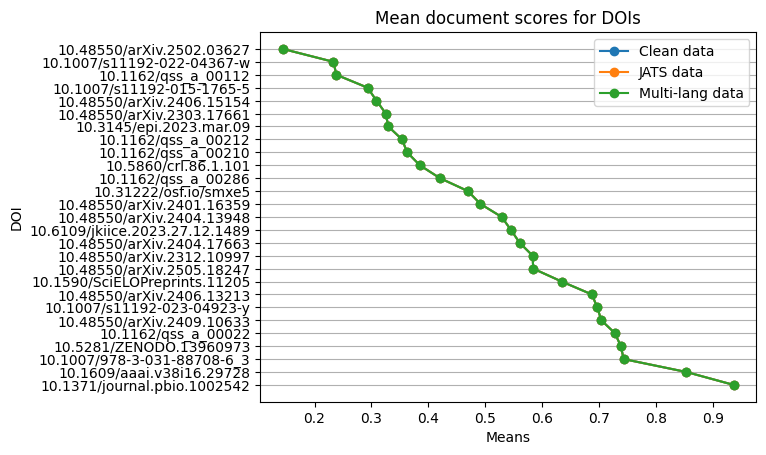

In [73]:
fig,ax = plt.subplots()
plt.plot(data_documents_score_grouped_together[['data_mean','jats_mean','multi_lang_mean']],
        data_documents_score_grouped_together['DOI'],
        marker='o',
        linestyle='-',data=data_documents_score_grouped_together)
plt.xlabel('Means')
plt.ylabel('DOI')
plt.title("Mean document scores for DOIs")
ax.legend(('Clean data', 'JATS data', 'Multi-lang data'), loc='upper right')
plt.grid(visible=True,axis='y')
plt.show()

In [74]:
# join the sets together:data_documents_exploded, data_jats_documents_exploded, data_multi_lang_documents_exploded

data_combined_doc_score = data_documents_exploded.merge(data_jats_documents_exploded, left_on='DOI', right_on='DOI', how='inner', suffixes=('_data','_jats'))
data_combined_doc_score = data_combined_doc_score.merge(data_multi_lang_documents_exploded, on='DOI', how='inner')
data_combined_doc_score = data_combined_doc_score.rename(columns={'DOI':'DOI',
                                                            'Score_data':'Score_data',
                                                            'Score_jats':'Score_jats',
                                                            'Score':'Score_multi_lang'})
data_combined_doc_score
# reset index 

,DOI,Score_data,Score_jats,Score_multi_lang
0,10.1162/qss_a_00286,0.651998,0.651998,0.651998
1,10.1162/qss_a_00286,0.651998,0.651998,0.273900
2,10.1162/qss_a_00286,0.651998,0.651998,0.335547
3,10.1162/qss_a_00286,0.651998,0.273900,0.651998
4,10.1162/qss_a_00286,0.651998,0.273900,0.273900
...,...,...,...,...
420,10.48550/arXiv.2404.13948,0.327949,0.327949,0.327949
421,10.6109/jkiice.2023.27.12.1489,0.322100,0.768265,0.768265
422,10.6109/jkiice.2023.27.12.1489,0.322100,0.768265,0.322100
423,10.6109/jkiice.2023.27.12.1489,0.322100,0.322100,0.768265


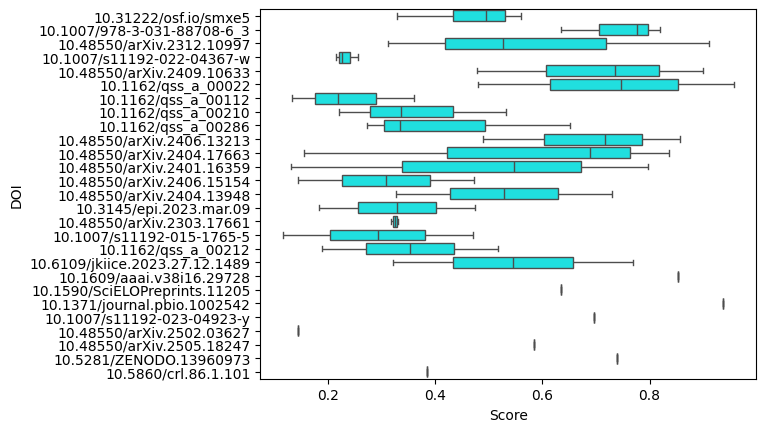

In [76]:
# count of DOIs - how is this different than golden set
data_documents_score_count = pd.DataFrame(data_documents_exploded.groupby(data_documents_exploded['DOI']).count())
data_documents_score_count = data_documents_score_count.sort_values('Score',ascending=False)

#save out
#data_documents_score_count.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_documents_score_count.xlsx")

data_documents_score_count

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# **********  SET THE FILTER TO AN APPROPRIATE AMOUNT *************
data_documents_score_count_top = data_documents_score_count[data_documents_score_count['Score']>=1]
data_documents_score_count_top.reset_index(inplace=True,drop=False)
data_documents_score_count_top_merged = data_documents_score_count_top.merge(data_documents_exploded, on='DOI', how='left')
data_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_documents_score_count_top_merged['Score'],
            y=data_documents_score_count_top_merged['DOI'],
            data=data_documents_score_count_top_merged,
            color='cyan',)

plt.show()

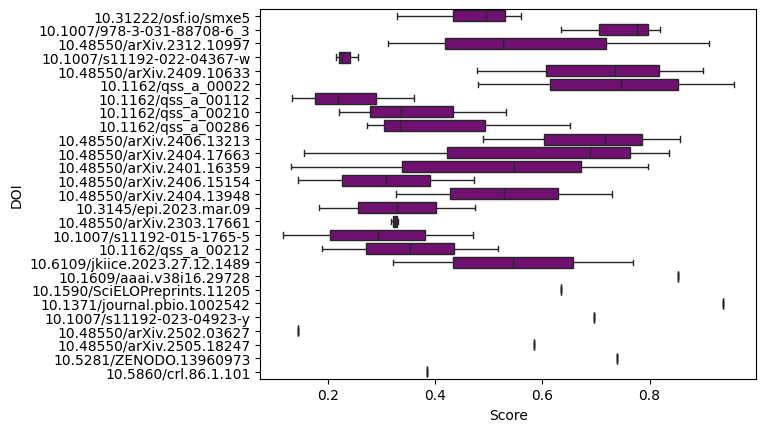

In [78]:
# let's do the same for JATS-tagged dataset
#data_jats_documents_exploded
# count of DOIs - how is this different than golden set
data_jats_documents_score_count = pd.DataFrame(data_jats_documents_exploded.groupby(data_jats_documents_exploded['DOI']).count())
data_jats_documents_score_count = data_jats_documents_score_count.sort_values('Score',ascending=False)

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# ************* SET THE FILTER LIMIT ************
data_jats_documents_score_count_top = data_jats_documents_score_count[data_jats_documents_score_count['Score']>=1]
data_jats_documents_score_count_top.reset_index(inplace=True,drop=False)
data_jats_documents_score_count_top_merged = data_jats_documents_score_count_top.merge(data_jats_documents_exploded, on='DOI', how='left')
data_jats_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_jats_documents_score_count_top_merged['Score'],
            y=data_jats_documents_score_count_top_merged['DOI'],
            data=data_jats_documents_score_count_top_merged,
            color='purple',)
plt.show()

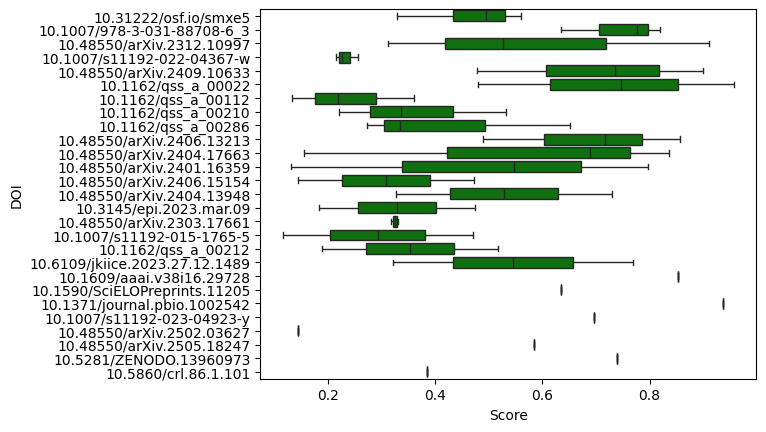

In [79]:
# let's do the same for multilingual dataset
#data_multi_lang_documents_exploded
# count of DOIs - how is this different than golden set
data_multi_lang_documents_score_count = pd.DataFrame(data_multi_lang_documents_exploded.groupby(data_multi_lang_documents_exploded['DOI']).count())
data_multi_lang_documents_score_count = data_multi_lang_documents_score_count.sort_values('Score',ascending=False)

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# *********** SET THE FILTER LIMIT **********
data_multi_lang_documents_score_count_top = data_multi_lang_documents_score_count[data_multi_lang_documents_score_count['Score']>=1]
data_multi_lang_documents_score_count_top.reset_index(inplace=True,drop=False)
data_multi_lang_documents_score_count_top_merged = data_multi_lang_documents_score_count_top.merge(data_multi_lang_documents_exploded, on='DOI', how='left')
data_multi_lang_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_multi_lang_documents_score_count_top_merged['Score'],
            y=data_multi_lang_documents_score_count_top_merged['DOI'],
            data=data_multi_lang_documents_score_count_top_merged,
            color='green',)
plt.show()

# Response analysis


In [80]:
# read in data
data_response = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/dense_answer_relevance_results.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
data_jats_response = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/dense_answer_relevance_results.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
data_multi_lang_response = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/dense_answer_relevance_results.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
print(f"Len multi_lang: {len(data_multi_lang_response)}")
print(f"Len jats: {len(data_jats_response)}")
print(f"Len data: {len(data_response)}")



Len multi_lang: 14
Len jats: 14
Len data: 14


In [81]:
data_response_grouped = pd.DataFrame(data_response.groupby(data_response['Query'])['Answer relevance'].agg('mean'))
data_response_grouped.reset_index(inplace=True,drop=False)
data_response_grouped

data_jats_response_grouped = pd.DataFrame(data_jats_response.groupby(data_jats_response['Query'])['Answer relevance'].agg('mean'))
data_jats_response_grouped.reset_index(inplace=True,drop=False)
data_jats_response_grouped

data_multi_lang_response_grouped = pd.DataFrame(data_multi_lang_response.groupby(data_multi_lang_response['Query'])['Answer relevance'].agg('mean'))
data_multi_lang_response_grouped.reset_index(inplace=True,drop=False)
data_multi_lang_response_grouped

response_grouped_together = data_response_grouped.merge(data_jats_response_grouped,on='Query')
response_grouped_together = response_grouped_together.merge(data_multi_lang_response_grouped,on='Query')
response_grouped_together.rename(inplace=True,columns={'Query':'Query',
                                                        'Answer relevance_x':'Relevance_data',
                                                        'Answer relevance_y':'Relevance_jats',
                                                        'Answer relevance':'Relevance_multi_lang'})
#save out
file_name = "response_grouped_together.xlsx"
save_location = f"{file_folder}{file_name}"
response_grouped_together.to_excel(save_location)
response_grouped_together

,Query,Relevance_data,Relevance_jats,Relevance_multi_lang
0,['How is RAG used to improve question answerin...,0.0,0.0,0.0
1,['Tell me about Crossref.'],0.0,0.0,0.0
2,['Tell me about OpenAlex.'],1.0,1.0,1.0
3,['What are the key features and limitations of...,1.0,1.0,1.0
4,['What are the main challenges in normalizing ...,0.0,0.0,0.0
5,['What are the strengths and weaknesses of Web...,1.0,1.0,1.0
6,['What is Crossref’s role in the scholarly res...,0.0,0.0,0.0
7,['What methods are used to detect and correct ...,1.0,1.0,1.0
8,"['Which papers address funding metadata, its a...",1.0,1.0,1.0
9,['Which papers discuss the use of Retrieval-Au...,1.0,1.0,1.0


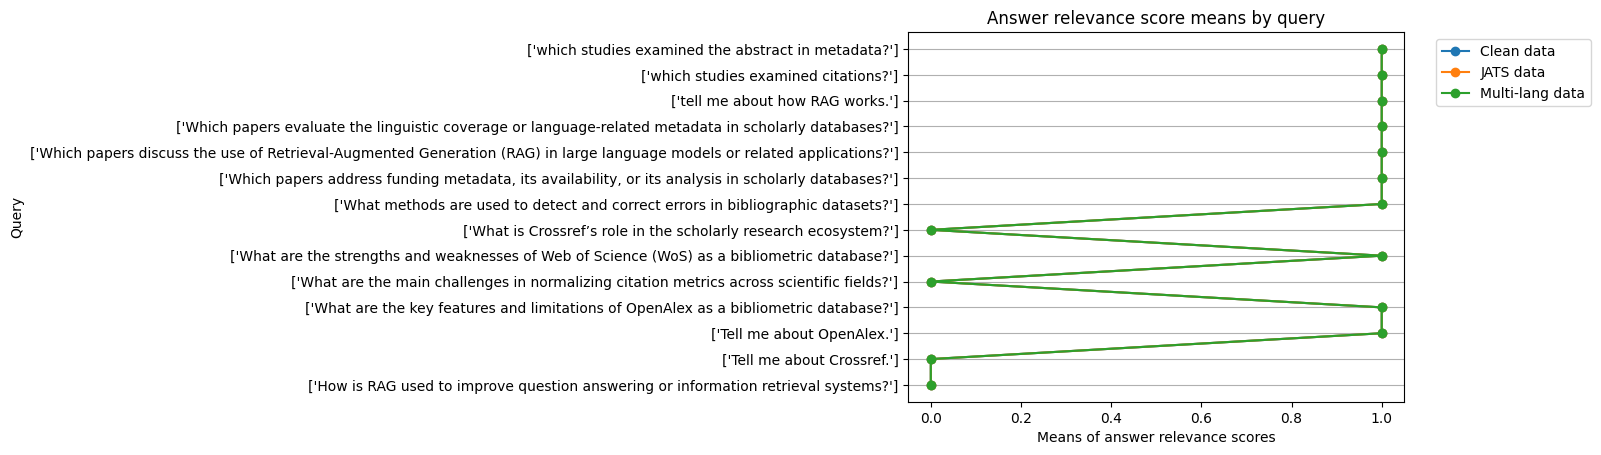

In [82]:
# let's see a plot of these values
fig,ax = plt.subplots()
plt.plot(response_grouped_together[['Relevance_data','Relevance_jats','Relevance_multi_lang']],
        response_grouped_together['Query'],
        marker='o',
        linestyle='-',data=response_grouped_together)
plt.xlabel('Means of answer relevance scores')
plt.ylabel('Query')
plt.title("Answer relevance score means by query")
ax.legend(('Clean data', 'JATS data', 'Multi-lang data'), loc='best', bbox_to_anchor=(1.05,1))
plt.grid(visible=True,axis='y')
plt.show()